### Rose Tovar
### TMDB Visual Exporlatory
### 9/21/2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Uploading Data
movies00 = pd.read_csv("./Data/final_tmdb_data_2000.csv.gz", low_memory = False)
#removing row 0 due to it being id 0 and all nan
movies00.drop(0, inplace=True)
movies00.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN


In [3]:
# Uploading Data
movies01 = pd.read_csv("./Data/final_tmdb_data_2001.csv.gz", low_memory = False)
movies01.drop(0, inplace=True)
movies01.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1141.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN


In [7]:
full_movie_data = pd.concat([movies00, movies01])

In [8]:
full_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2572 entries, 1 to 1321
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2572 non-null   object 
 1   adult                  2572 non-null   float64
 2   backdrop_path          1316 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2572 non-null   float64
 5   genres                 2572 non-null   object 
 6   homepage               180 non-null    object 
 7   id                     2572 non-null   float64
 8   original_language      2572 non-null   object 
 9   original_title         2572 non-null   object 
 10  overview               2516 non-null   object 
 11  popularity             2572 non-null   float64
 12  poster_path            2252 non-null   object 
 13  production_companies   2572 non-null   object 
 14  production_countries   2572 non-null   object 
 15  rele

### Downloading Combined copy of dataframe

In [9]:
full_movie_data.to_csv(f"Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)


### Data Visualization

In [11]:
# Setting up Visualization Features
# Setting up Default Settings for plots
sns.set_context('talk')
plt.style.use(['bmh', 'seaborn'])
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.grid'] = False

In [14]:
valid_budget = full_movie_data[(full_movie_data['budget'] > 0) & (full_movie_data['revenue'] > 0)]
# We have 349 movies left for valid budgets and revenue
valid_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 4 to 1273
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                349 non-null    object 
 1   adult                  349 non-null    float64
 2   backdrop_path          337 non-null    object 
 3   belongs_to_collection  84 non-null     object 
 4   budget                 349 non-null    float64
 5   genres                 349 non-null    object 
 6   homepage               57 non-null     object 
 7   id                     349 non-null    float64
 8   original_language      349 non-null    object 
 9   original_title         349 non-null    object 
 10  overview               349 non-null    object 
 11  popularity             349 non-null    float64
 12  poster_path            349 non-null    object 
 13  production_companies   349 non-null    object 
 14  production_countries   349 non-null    object 
 15  relea

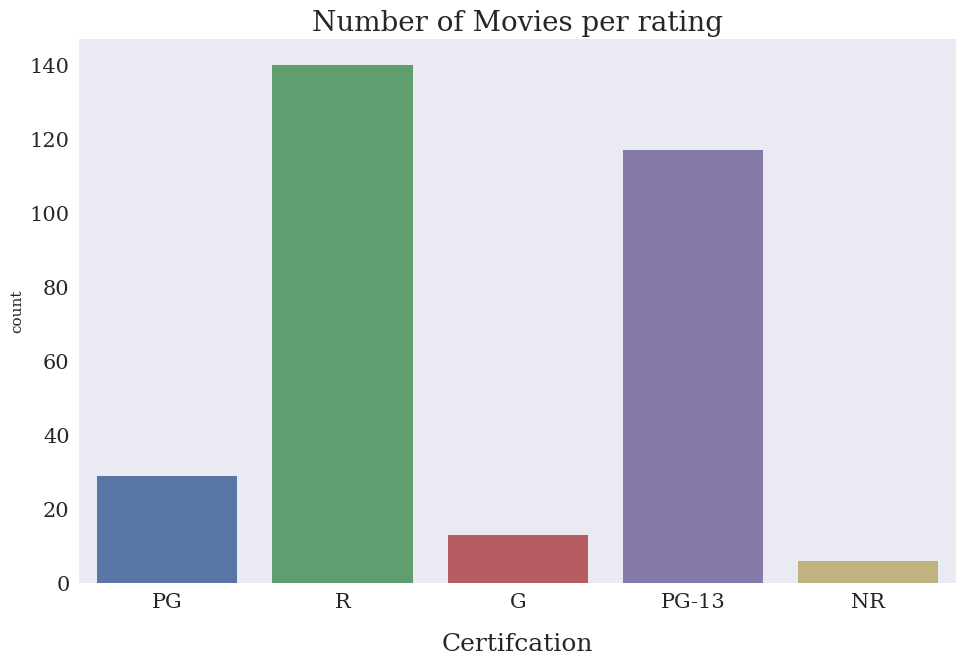

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=valid_budget, x='certifcation', ax=ax)
ax.set_xlabel("Certifcation", fontsize=18,labelpad=15)
ax.set_title('Number of Movies per rating', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.tight_layout()

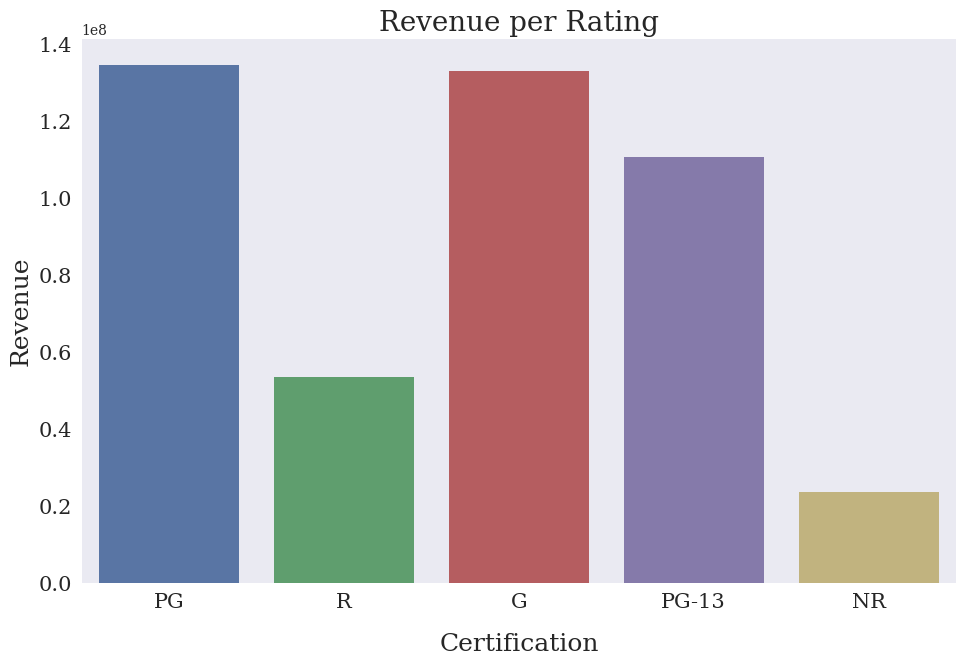

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=valid_budget, x='certifcation',y='revenue',ci=None)
ax.set_xlabel('Certification', fontsize=18, labelpad=15)
ax.set_ylabel("Revenue", fontsize=18)
ax.set_title('Revenue per Rating', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

### Analysis

On Avearage rated PG movies made about 130,000,000 in revenue, The rated R movies made around 60,000,000, Rated G movies made around 130,000,000, PG-13 made around 110,000,000, and finally NR made 20,000,000 in revenue

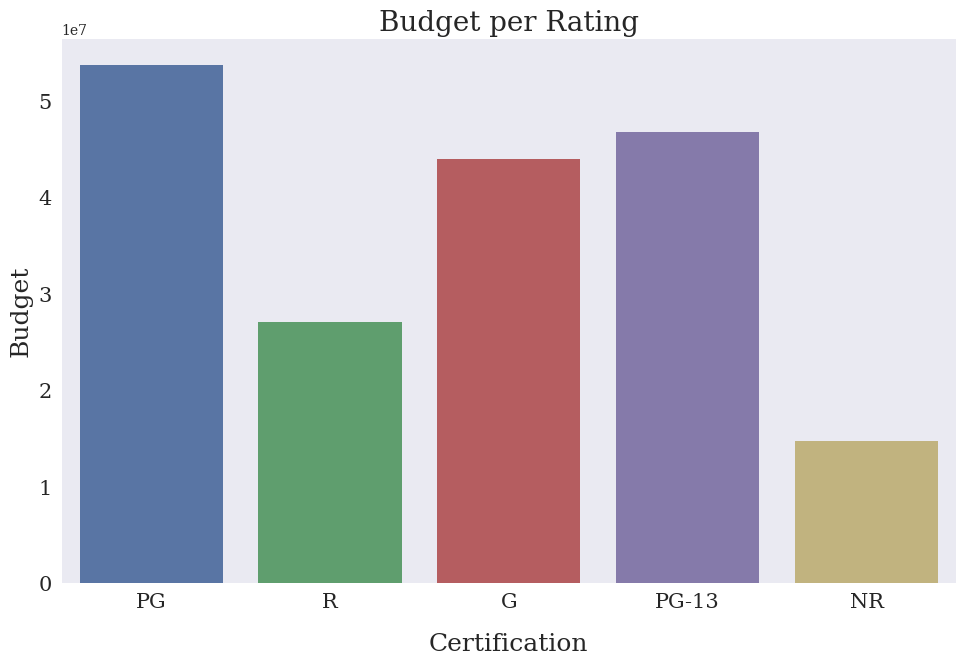

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=valid_budget, x='certifcation',y='budget',ci=None)
ax.set_xlabel('Certification', fontsize=18, labelpad=15)
ax.set_ylabel("Budget", fontsize=18)
ax.set_title('Budget per Rating', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#### Analysis

We have about 50,000,000 million for spent on PG Movies, just about 30,000,000, for rated R, 40,000,000, on G and PG-13 Movies, and finally 15,000,000, on NR Movies. 